기본 아이디어
<br>정신력은 코인의 앞면 확률로 변환된다.
<br>정신력에 따른 코인의 앞면 확률을 $P$, 정신력 수치를 $m$ 라고 정의하면
$$P = 50 + (m|m|)/100, (45>=m>=-45)$$ 에 해당한다. 

또한 위력 / 코인위력도 기존 스킬의 능력치에 가중치를 부여하는 방법으로 적용한다.

따라서, 림버스 컴퍼니의 합 시스템에 들어가게 되는 스킬의 정보는 
<br> **점수의 기본값, 코인의 수, 앞면시 코인의 점수, 코인의 앞면 확률**로 정의할 수 있다. 

#0.import

numpy와 pyplot 모듈을 사용, import함.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#1.proto type battle functions


In [2]:
def battle_score(_base_score, _coin_quantity, _front_score, _front_probability = 0.5):
  base_score =_base_score
  coin_quantity = _coin_quantity
  front_score = _front_score
  front_probability = _front_probability

  result_score = base_score

  for i in range(coin_quantity):
    toss = float(np.random.uniform(0,1))
    if toss < front_probability:
      result_score += front_score

    else:
      pass

  return result_score

  #기본 합을 위해 필요한 코인토스 결과 리턴 함수


In [3]:
def Clash(skill_inform1, skill_inform2):
  base1, coin_quantity1, coin_score1, probability_1 = skill_inform1
  base2, coin_quantity2, coin_score2, probability_2 = skill_inform2

  coin_quantity_temp1 = coin_quantity1
  coin_quantity_temp2 = coin_quantity2

  while coin_quantity_temp1 > 0 and coin_quantity_temp2 > 0:
    result_score1 = battle_score(base1, coin_quantity_temp1, coin_score1, probability_1)
    result_score2 = battle_score(base2, coin_quantity_temp2, coin_score2, probability_2)

    if result_score1 > result_score2:
      coin_quantity_temp2 -= 1

    elif result_score2 > result_score1:
      coin_quantity_temp1 -= 1

  if coin_quantity_temp1 > 0:
    return "skill 1 win"

  elif coin_quantity_temp1 == 0 and coin_quantity_temp2 == 0:
    return "error : both side skill coins are not remain."

  else:
    return "skill 2 win"


합에서 질 경우, 첫번째 코인을 제외하고 다시한번 합을 진행한다.
모든 코인을 소모할 경우 합에서 최종적으로 패배한다.

In [4]:
skill5 = [5, 1, 25, 0.7]
skill6 = [3, 5, 2, 0.5]


In [5]:
skill_datas = [skill5, skill6]
repeat_num = 50

In [6]:
def change_list(skill, prob):
  return[skill[0], skill[1], skill[2], prob]

In [7]:

won_cnt = 0
for i in range(repeat_num):
  result = Clash(skill_datas[0], skill_datas[1])
  if result == "skill 1 win":
    won_cnt += 1
  elif result == "error : both side skill coins are not remain.":
    print("error_Clash : both side skill coins are not remain.")

print("win_rate: " + str(won_cnt * 100 / repeat_num) + "%")

win_rate: 52.0%


In [8]:
def get_prob(skill1, skill2):
  won_cnt = 0
  for i in range(repeat_num):
    result = Clash(skill1, skill2)
    if result == "skill 1 win":
      won_cnt += 1
    
  return won_cnt * 100 / repeat_num

case1. 한쪽의 코인 앞면 확률만 변화할때.

In [9]:
def draw_skill_winrate(_skill1, _skill2, reprep_num = 100):
  skill2 = _skill2
  skill1_temp = _skill1
  
  x = np.linspace(0, 1, repeat_num)
  y = list()
  cnt = 0

  for i in x:
    cnt+=1
    results = list()  
    skill1 = change_list(skill1_temp, i)
    
    for i in range(reprep_num):
      results.append(get_prob(skill1, skill2))

    y.append(np.mean(results))
    if cnt % (repeat_num/10) == 0:
      print(str(cnt/(repeat_num/10))+"/10 completed.")

  """
  y_ = list()

  for i in range(len(y)-1):
    y_.append((y[i+1]-y[i]) / 0.001)
  
  y_.append(y_[-1])
  """

  plt.plot(x, y, alpha = 0.7, label="skill1's win rate by probability[x]")
  #plt.plot(x, y_, alpha = 0.7, label= "derivate of skill's win rate by probability[x]")
  plt.show()
  

1.0/10 completed.
2.0/10 completed.
3.0/10 completed.
4.0/10 completed.
5.0/10 completed.
6.0/10 completed.
7.0/10 completed.
8.0/10 completed.
9.0/10 completed.
10.0/10 completed.


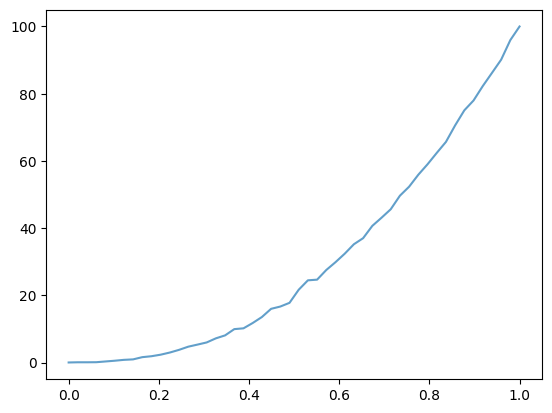

In [10]:
draw_skill_winrate(skill5, skill6)

case2. 두 쪽의 코인 확률이 변화할 때

In [14]:
def draw_skill_winrate2(_skill1, _skill2, reprep_num = 1):
  skill2_temp = _skill2
  skill1_temp = _skill1
  
  x = np.linspace(0, 1, repeat_num)
  y = np.linspace(0, 1, repeat_num)
  z = list()
  cnt = 0

  for i in x:
    z.append(list())
    for r in y:
      
      results = list()  
      skill1 = change_list(skill1_temp, i)
      skill2 = change_list(skill2_temp, r)
      for zq in range(reprep_num):
        results.append(get_prob(skill1, skill2))

      z[-1].append(np.mean(results)/100)

  plt.subplot(3, 1, 1)
  plt.xlim(-0.1, 1.1)
  plt.ylim(-0.1, 1.1)

  for x_ in range(len(x)):
    for y_ in range(len(y)):
      value = z[x_][y_]
      if value > 0.5:
        plt.scatter(float(x[x_]),float(y[y_]), c='r', alpha = value)
      else:
        plt.scatter(float(x[x_]), float(y[y_]), c='g', alpha = value)

#여기 아래부턴 해당 자료를 시각화하는 부분.
  plt.show()

  plt.subplot(3, 2, 1)
  plt.xlim(0.0, 0.7)
  plt.ylim(0.0, 0.7)

  for x_ in range(len(x)):
    for y_ in range(len(y)):
      value = z[x_][y_]
      if(value > 0.5):
        plt.scatter(float(x[x_]), float(y[y_]), c='r', alpha = value)
      else:
        plt.scatter(float(x[x_]), float(y[y_]), c = 'g', alpha = value)

  plt.show()

  plt.subplot(3, 2, 3)

  plt.xlim(0.0, 0.7)
  plt.ylim(0.0,0.7)

  for x_ in range(len(x)):
    for y_ in range(len(y)):
      value = z[x_][y_]
      if value > 0.5:
        plt.scatter(x[x_], y[y_], c = 'r', alpha = 0.7)
      else:
        plt.scatter(x[x_], y[y_], c = 'g', alpha = 0.7)  

  

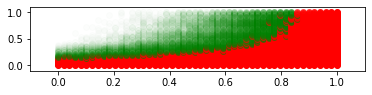

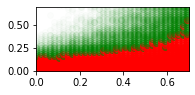

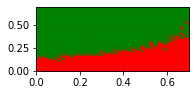

In [15]:
draw_skill_winrate2(skill5, skill6, 2)

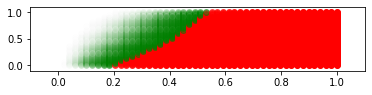

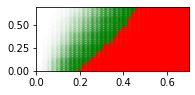

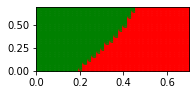

In [16]:
정신채찍 = [2, 4, 5, 0.5]
공간절단 = [6, 3, 2, 0.5]

draw_skill_winrate2(정신채찍, 공간절단, 100)


In [17]:
내장파기 = [4, 4, 2, 0.5]
신속한제압 = [3, 5, 2, 0.5]
처단 = [6, 3, 2, 0.5]

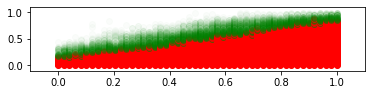

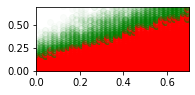

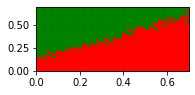

In [18]:
draw_skill_winrate2(내장파기, 신속한제압)

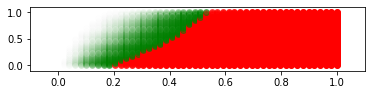

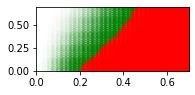

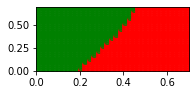

In [19]:
draw_skill_winrate2(정신채찍, 처단, 100)

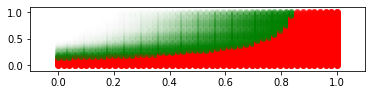

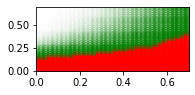

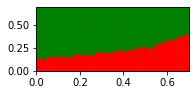

In [22]:
draw_skill_winrate2(skill5, skill6, 100)

#2. battle_functions

위에서 작업한 내용들을 토대로 하여 마지막으로 확률을 시각화하는 함수들을 만듬.
<br> 또한, 인격을 지정해서 특정 스킬과 비교할 수 있는 클래스 또한 작성.

In [ ]:
내장파기 = ["내장파기", 4, 4, 2, 46]

#스킬은 스킬이름 = [스킬이름, 기본값, 코인 갯수, 가중치, 공격레벨] 의 형태로 작성.

In [174]:
class Personality:
    skills = dict()
    character_name = None
    personality_name = None
    guard = None
    speed = []
    hp = 0
    
    def __init__(self, _character="이상", _name="LCB 수감자", _status = None, _skill1 = None, _skill2 = None, _skill3 = None):
        self.character_name = _character
        self.personality_name = _name
        self.status = _status
    
        self.skills[_skill1[0]] = _skill1[1:]
        self.skills[_skill2[0]] = _skill2[1:]
        self.skills[_skill3[0]] = _skill3[1:]
        self.guard = _status['guard']
        self.speed = _status['speed']
        self.hp = _status['hp']
    
    def apply_power():
        pass

    def apply_coin_power():
        pass

    def apply_mentality():
        pass

    def show_information(self):
        cnt = 0
        skill_stat = ["base value: ", "coin count: ", "coin value: "]
        print( "[" + self.character_name + "-" + self.personality_name + "] \n")
        print("\n", end="")
        print("[character status]")
        print("hp: "+str(self.hp)+ "   " +"speed: "+ str(self.speed[0]) +"-"+ str(self.speed[1])+ "   " +"guard level: "+ str(self.guard))
        print("")
        print("\n[skill status]\n")
        for name, stat in self.skills.items():
            cnt += 1
            print(" "*2 + "skill" + str(cnt)+":" + str(name)+"    "+"attack status: "+ str(stat[-1]))
            for i in range(3):
                print(skill_stat[i] + str(stat[i]), end="     ")
                
            print("\n")
        
        
    
    def get_winning_probility():
        pass


#현재는 상태이상이나 버프의 영향 없이, 스킬 원본 값만 취급하여 사용.

## 인격 대입 예시

In [175]:
#이상, 검계 살수

격세 = ["격세", 5, 1, 6, 41]
두의틀기 = ["두의틀기", 7, 2, 1, 41]
이면찬자 = ["이면찬자", 8, 3, 1, 41]
character_status = dict()
character_status['hp'] = 134
character_status['guard'] = 28
character_status['speed'] = [3, 7]

이상_검계살수 = Personality(_character = "이상", _name = "검계 살수",  _status = character_status, 
                      _skill1=격세, _skill2=두의틀기, _skill3=이면찬자)

In [176]:
이상_검계살수.show_information()

[이상-검계 살수] 


[character status]
hp: 134   speed: 3-7   guard level: 28


[skill status]

  skill1:격세    attack status: 41
base value: 5     coin count: 1     coin value: 6     

  skill2:두의틀기    attack status: 41
base value: 7     coin count: 2     coin value: 1     

  skill3:이면찬자    attack status: 41
base value: 8     coin count: 3     coin value: 1     



In [177]:
dec = dict()

dec['a'] = 'b'
dec['b'] = 'c'
dec['c'] = 'e'

dec

for key, item in dec.items():
    print(key, item)

a b
b c
c e
